In [1]:
from google.colab import files
uploaded = files.upload()

Saving car details v4.csv to car details v4.csv


PCA Explained Variance Ratio: [0.42556607 0.20599288]
Total Variance Captured: 0.6315589502361547


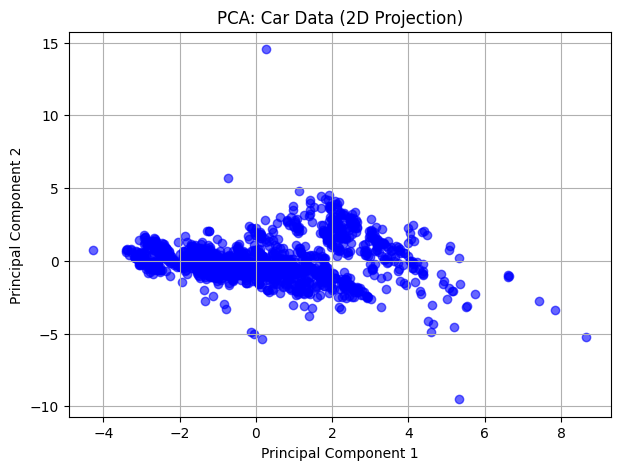

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


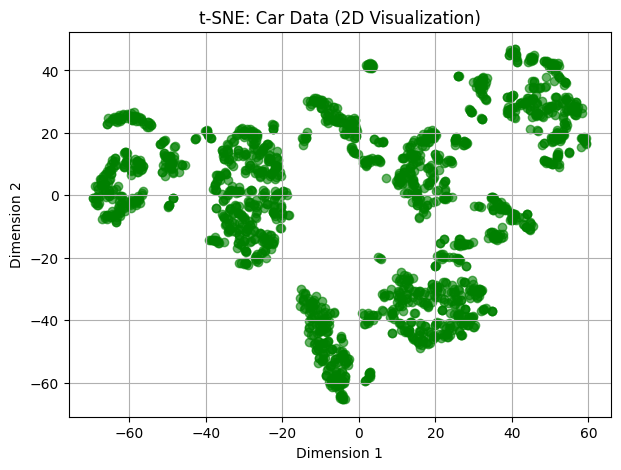

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# --- Load dataset ---
data = pd.read_csv("car details v4.csv")
data.columns = data.columns.str.strip().str.lower()

# --- Select numeric columns ---
numeric_cols = ['price', 'year', 'kilometer', 'length', 'width', 'height',
                'seating capacity', 'fuel tank capacity']
X = data[numeric_cols].dropna()

# --- Standardize (important for PCA & t-SNE) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================================
# 1️⃣ PCA - Linear Dimensionality Reduction
# ==========================================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))

# --- Plot PCA ---
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='blue')
plt.title("PCA: Car Data (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# ==========================================================
# 2️⃣ t-SNE - Nonlinear Dimensionality Reduction
# ==========================================================
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# --- Plot t-SNE ---
plt.figure(figsize=(7,5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6, c='green')
plt.title("t-SNE: Car Data (2D Visualization)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
